<center><img src="images/logo.png" alt="drawing" width="400" style="background-color:white; padding:1em;" /></center> <br/>

<img src="images/lifecycle.png" alt="drawing" width="800" style="background-color:white; padding:1em;" />

<div class="alert alert-block alert-success"><span style="color:blue"><h1>ML through Application</h1></span></div>
<div class="alert alert-block alert-warning">
<span style="color:blue"><h2>Module 2, Lab 4: Using Logistic Regression</h2></span></div>

In this notebook, you will build a [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model to predict the Outcome Type feature of the dataset. You will also look at how probability threshold calibration can help to improve a classifier's performance.
Probability threshold calibration is a way to calibrate the model working on the output from the logistic regression model for binary classification. For example, if the model needs to predict class 1, you can put a threshold to consider that the the output belongs to class 1 only if the probability is greater than 80%. Otherwise, it belongs to class 0.

You will learn how to do the following:

- Do basic data processing.
- Explain how and why you create training, testing, and validation datasets.
- Use a pipeline and ColumnTransformers to process data.
- Train a classifier.
- Test the performance of a classifier.
- Identify ways to improve a classifier by using probability threshold calibration.

----

__Austin Animal Center Dataset__

In this lab, you will work with historical pet adoption data in the [Austin Animal Center Shelter Intakes and Outcomes dataset](https://www.kaggle.com/datasets/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes?resource=download). The target field of the dataset (**Outcome Type**) is the outcome of adoption:<span style="color:red"><b> 1 for adopted and 0 for not adopted.</b></span> Multiple features are used in the dataset.

Dataset schema:
- __Pet ID:__ Unique ID of the pet
- __Outcome Type:__ State of pet at the time of recording the outcome (0 = not placed, 1 = placed). This is the field to predict.
- __Sex upon Outcome:__ Sex of pet at outcome
- __Name:__ Name of pet 
- __Found Location:__ Found location of pet before it entered the shelter
- __Intake Type:__ Circumstances that brought the pet to the shelter
- __Intake Condition:__ Health condition of the pet when it entered the shelter
- __Pet Type:__ Type of pet
- __Sex upon Intake:__ Sex of pet when it entered the shelter
- __Breed:__ Breed of pet 
- __Color:__ Color of pet 
- __Age upon Intake Days:__ Age (days) of pet when it entered the shelter
- __Age upon Outcome Days:__ Age (days) of pet at outcome

----

You will be presented with two kinds of exercises throughout the notebook: activities and challenges. <br/>

| <img style="float: center;" src="images/activity.png" alt="Activity" width="125"/>| <img style="float: center;" src="images/challenge.png" alt="Challenge" width="125"/>|
| --- | --- |
|<p style="text-align:center;">No coding is needed for an activity. You try to understand a concept, <br/>answer questions, or run a code cell.</p> |<p style="text-align:center;">Challenges are where you can practice your coding skills.</p>

<div class="alert alert-block alert-warning">
<h3><span style="color:blue">Adoption Classification</span></h3></div>

   (**Outcome Type**) is the outcome of adoption:<span style="color:red"><b> 1 for adopted and 0 for not adopted.</b></span>

<center><img src="logistic_function.png" alt="drawing" width="800" style="background-color:white; padding:1em;" /></center>

---
<div class="alert alert-block alert-success">
<h1><span style="color:blue">Index</span></h1></div>

- [Data processing](#Data-processing)
- [Train a classifier](#Train-a-classifier)
- [Test the classifier](#Test-the-classifier)
- [Improvement ideas: Probability threshold calibration](#Improvement-ideas:-Probability-threshold-calibration)

---
<div class="alert alert-block alert-success">
<h1><span style="color:blue">Data processing</span></h1></div>

To get started, you will process the dataset the same way that you did in the previous labs. Run all the cells in this section before you move to the section where you train the model.

One of the most important steps is to clean the data. You should do this _before_ you split the data into training, testing, and validation datasets to be more efficient with your coding.

In [1]:
%%capture
# installing libraries
!pip install -U -q -r requirements.txt

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
from sklearn.impute import SimpleImputer

In [3]:
df = pd.read_csv("data/review_dataset.csv")

print("The shape of the dataset is:", df.shape)

The shape of the dataset is: (95485, 13)


---
<div class="alert alert-block alert-success">
<h1><span style="color:blue">Analyzing Data</span></h1></div>

---
<div class="alert alert-block alert-warning">
<h2><span style="color:blue">Data Snapshot</span></h2></div>

In [4]:
df.head(10)

,Pet ID,Outcome Type,Sex upon Outcome,Name,Found Location,Intake Type,Intake Condition,Pet Type,Sex upon Intake,Breed,Color,Age upon Intake Days,Age upon Outcome Days
0,A794011,1.0,Neutered Male,Chunk,Austin (TX),Owner Surrender,Normal,Cat,Neutered Male,Domestic Shorthair Mix,Brown Tabby/White,730,730
1,A776359,1.0,Neutered Male,Gizmo,7201 Levander Loop in Austin (TX),Stray,Normal,Dog,Intact Male,Chihuahua Shorthair Mix,White/Brown,365,365
2,A674754,0.0,Intact Male,NaN,12034 Research in Austin (TX),Stray,Nursing,Cat,Intact Male,Domestic Shorthair Mix,Orange Tabby,6,6
3,A689724,1.0,Neutered Male,*Donatello,2300 Waterway Bnd in Austin (TX),Stray,Normal,Cat,Intact Male,Domestic Shorthair Mix,Black,60,60
4,A680969,1.0,Neutered Male,*Zeus,4701 Staggerbrush Rd in Austin (TX),Stray,Nursing,Cat,Intact Male,Domestic Shorthair Mix,White/Orange Tabby,7,60
5,A684617,0.0,Intact Female,NaN,10015 Lake Creek Pkwy in Austin (TX),Stray,Normal,Cat,Intact Female,Domestic Shorthair Mix,Black,730,730
6,A742354,1.0,Neutered Male,Artemis,9200 N Plaza Dr in Austin (TX),Stray,Normal,Cat,Neutered Male,Domestic Shorthair Mix,Blue/White,2555,2555
7,A681036,0.0,Intact Male,NaN,Hill Croft Drive & Loyola Lane in Austin (TX),Stray,Normal,Cat,Intact Male,Domestic Shorthair Mix,Brown Tabby,2,2
8,A803149,0.0,Intact Male,*Birch,2607 Garrettson Drive in Austin (TX),Stray,Normal,Cat,Intact Male,Domestic Shorthair,Brown Tabby,14,21
9,A773792,0.0,Intact Male,NaN,8711 Johnny Morris in Austin (TX),Stray,Normal,Cat,Intact Male,Domestic Shorthair Mix,Orange Tabby,28,28


<b>To remember what the data looks like, print the names of the features.</b>

In [5]:
print(df.columns)

Index(['Pet ID', 'Outcome Type', 'Sex upon Outcome', 'Name', 'Found Location',
       'Intake Type', 'Intake Condition', 'Pet Type', 'Sex upon Intake',
       'Breed', 'Color', 'Age upon Intake Days', 'Age upon Outcome Days'],
      dtype='object')


---
<div class="alert alert-block alert-warning">
<h2><span style="color:blue">Reordering Columns to show Model Features versus Model Target</span></h2></div>

In [6]:
df = df[['Pet ID', 'Sex upon Outcome', 'Name', 'Found Location',
       'Intake Type', 'Intake Condition', 'Pet Type', 'Sex upon Intake',
       'Breed', 'Color', 'Age upon Intake Days', 'Age upon Outcome Days','Outcome Type']]

In [7]:
df.head(10)

,Pet ID,Sex upon Outcome,Name,Found Location,Intake Type,Intake Condition,Pet Type,Sex upon Intake,Breed,Color,Age upon Intake Days,Age upon Outcome Days,Outcome Type
0,A794011,Neutered Male,Chunk,Austin (TX),Owner Surrender,Normal,Cat,Neutered Male,Domestic Shorthair Mix,Brown Tabby/White,730,730,1.0
1,A776359,Neutered Male,Gizmo,7201 Levander Loop in Austin (TX),Stray,Normal,Dog,Intact Male,Chihuahua Shorthair Mix,White/Brown,365,365,1.0
2,A674754,Intact Male,NaN,12034 Research in Austin (TX),Stray,Nursing,Cat,Intact Male,Domestic Shorthair Mix,Orange Tabby,6,6,0.0
3,A689724,Neutered Male,*Donatello,2300 Waterway Bnd in Austin (TX),Stray,Normal,Cat,Intact Male,Domestic Shorthair Mix,Black,60,60,1.0
4,A680969,Neutered Male,*Zeus,4701 Staggerbrush Rd in Austin (TX),Stray,Nursing,Cat,Intact Male,Domestic Shorthair Mix,White/Orange Tabby,7,60,1.0
5,A684617,Intact Female,NaN,10015 Lake Creek Pkwy in Austin (TX),Stray,Normal,Cat,Intact Female,Domestic Shorthair Mix,Black,730,730,0.0
6,A742354,Neutered Male,Artemis,9200 N Plaza Dr in Austin (TX),Stray,Normal,Cat,Neutered Male,Domestic Shorthair Mix,Blue/White,2555,2555,1.0
7,A681036,Intact Male,NaN,Hill Croft Drive & Loyola Lane in Austin (TX),Stray,Normal,Cat,Intact Male,Domestic Shorthair Mix,Brown Tabby,2,2,0.0
8,A803149,Intact Male,*Birch,2607 Garrettson Drive in Austin (TX),Stray,Normal,Cat,Intact Male,Domestic Shorthair,Brown Tabby,14,21,0.0
9,A773792,Intact Male,NaN,8711 Johnny Morris in Austin (TX),Stray,Normal,Cat,Intact Male,Domestic Shorthair Mix,Orange Tabby,28,28,0.0


In [8]:
df.dtypes

Pet ID                    object
Sex upon Outcome          object
Name                      object
Found Location            object
Intake Type               object
Intake Condition          object
Pet Type                  object
Sex upon Intake           object
Breed                     object
Color                     object
Age upon Intake Days       int64
Age upon Outcome Days      int64
Outcome Type             float64
dtype: object

<div style="border: 4px solid coral; text-align: center; margin: auto;">
    <h3><i>Try it yourself!</i></h3>
    <br>
    <p style="text-align:center;margin:auto;"><img src="images/challenge.png" alt="Challenge" width="100" /> </p>
    <p style=" text-align: center; margin: auto;">In the following code cell, create four lists that contain the names of the numerical, categorical, text, and all features, in addition to a variable for the target (label).</p><br>
    <p style=" text-align: center; margin: auto;">Use the following names for the lists: <code>numerical_features</code>, <code>categorical_features</code>, <code>text_features</code>, <code>model_features</code>, and <code>model_target</code>.</p>
    <br>
    <p style=" text-align: center; margin: auto;"> Note: Omit the Pet ID and Name features from the lists because they aren't relevant to the outcome.</p><br>
</div>



In [9]:
# Identify the numerical, categorical, and text features along with the target feature

numerical_features = ["Age upon Intake Days", "Age upon Outcome Days"]

categorical_features = [
    "Sex upon Outcome",
    "Intake Type",
    "Intake Condition",
    "Pet Type",
    "Sex upon Intake",
]

text_features = ["Name", "Found Location", "Breed", "Color"]

model_features = [
    "Pet ID", 
    "Sex upon Outcome",
    "Name",
    "Found Location",
    "Intake Type",
    "Intake Condition",
    "Pet Type", 
    "Sex upon Intake",
    "Breed",
    "Color",
    "Age upon Intake Days",
    "Age upon Outcome Days",
]

model_target = "Outcome Type"

---
<div class="alert alert-block alert-warning">
<h3><span style="color:blue">Clean numerical features</span></h3></div>

As you did in the previous lab, examine the numerical features. Remember that the <span style="color:red"><b>value_counts()</b></span> function can provide a view of the numerical features by placing feature values in respective bins. The function can also be used to plot a graph.

Age upon Intake Days
(-9.126, 912.5]     74835
(912.5, 1825.0]     10647
(1825.0, 2737.5]     3471
(2737.5, 3650.0]     3998
(3650.0, 4562.5]     1234
(4562.5, 5475.0]     1031
(5475.0, 6387.5]      183
(6387.5, 7300.0]       79
(7300.0, 8212.5]        5
(8212.5, 9125.0]        2
Name: count, dtype: int64


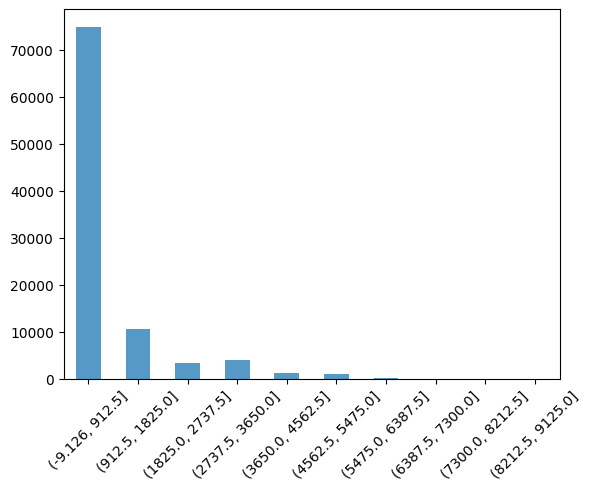

Age upon Outcome Days
(-9.126, 912.5]     74642
(912.5, 1825.0]     10699
(1825.0, 2737.5]     3465
(2737.5, 3650.0]     4080
(3650.0, 4562.5]     1263
(4562.5, 5475.0]     1061
(5475.0, 6387.5]      187
(6387.5, 7300.0]       81
(7300.0, 8212.5]        5
(8212.5, 9125.0]        2
Name: count, dtype: int64


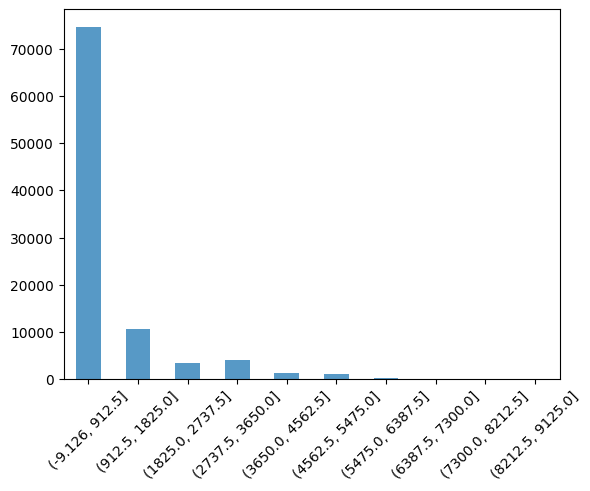

In [10]:
# Print and plot statistics for the numerical features
for c in numerical_features:
    # Print the name of the feature
    print(c)
    # Print the value counts in 10 bins for each feature
    print(df[c].value_counts(bins=10, sort=False))

    # Plot bar charts based on value_counts (alternative plot method)
    df[c].value_counts(bins=10, sort=False).plot(kind="bar", alpha=0.75, rot=45)
    plt.show()

If any outliers are identified as likely wrong values, dropping them could improve the numerical values histograms and overall model performance.

In this lab, you will remove any values in the <span style="color:red"><b>upper 10</b></span> percent for the feature and then plot the features.

In [11]:
for c in numerical_features:
    # Drop values beyond 90% of max()
    dropIndexes = df[df[c] > df[c].max() * 9 / 10].index
    df.drop(dropIndexes, inplace=True)

Age upon Intake Days
(-6.936, 693.5]     61425
(693.5, 1387.0]     18400
(1387.0, 2080.5]     5657
(2080.5, 2774.0]     3471
(2774.0, 3467.5]     2557
(3467.5, 4161.0]     1962
(4161.0, 4854.5]     1148
(4854.5, 5548.0]      596
(5548.0, 6241.5]      183
(6241.5, 6935.0]       63
Name: count, dtype: int64


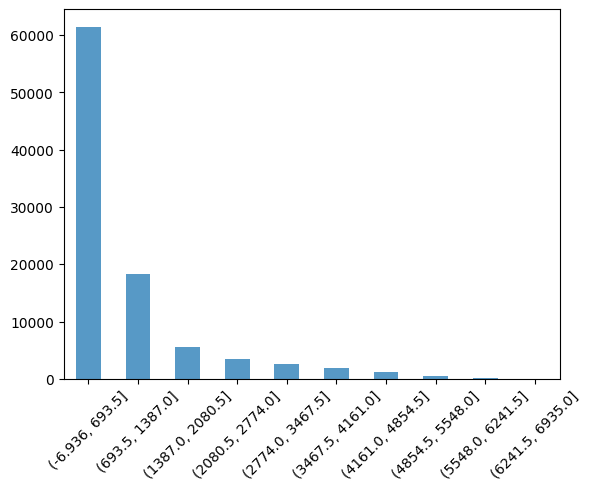

Age upon Outcome Days
(-6.936, 693.5]     61208
(693.5, 1387.0]     18490
(1387.0, 2080.5]     5643
(2080.5, 2774.0]     3465
(2774.0, 3467.5]     2600
(3467.5, 4161.0]     2004
(4161.0, 4854.5]     1196
(4854.5, 5548.0]      604
(5548.0, 6241.5]      187
(6241.5, 6935.0]       65
Name: count, dtype: int64


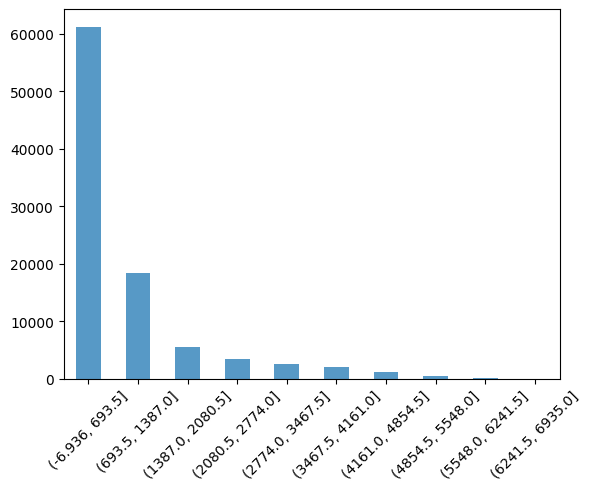

In [12]:
# Print and plot statistics for the numerical features
for c in numerical_features:
    # Print the name of the feature
    print(c)
    # Print the value counts in 10 bins for each feature
    print(df[c].value_counts(bins=10, sort=False))

    # Plot bar charts based on value_counts (alternative plot method)
    df[c].value_counts(bins=10, sort=False).plot(kind="bar", alpha=0.75, rot=45)
    plt.show()

### Clean text features

As you did in the previous lab, examine the text features. You can re-use the helper function from the previous notebook to process the data.

In [13]:
df[text_features].head(10)

,Name,Found Location,Breed,Color
0,Chunk,Austin (TX),Domestic Shorthair Mix,Brown Tabby/White
1,Gizmo,7201 Levander Loop in Austin (TX),Chihuahua Shorthair Mix,White/Brown
2,NaN,12034 Research in Austin (TX),Domestic Shorthair Mix,Orange Tabby
3,*Donatello,2300 Waterway Bnd in Austin (TX),Domestic Shorthair Mix,Black
4,*Zeus,4701 Staggerbrush Rd in Austin (TX),Domestic Shorthair Mix,White/Orange Tabby
5,NaN,10015 Lake Creek Pkwy in Austin (TX),Domestic Shorthair Mix,Black
6,Artemis,9200 N Plaza Dr in Austin (TX),Domestic Shorthair Mix,Blue/White
7,NaN,Hill Croft Drive & Loyola Lane in Austin (TX),Domestic Shorthair Mix,Brown Tabby
8,*Birch,2607 Garrettson Drive in Austin (TX),Domestic Shorthair,Brown Tabby
9,NaN,8711 Johnny Morris in Austin (TX),Domestic Shorthair Mix,Orange Tabby


In [14]:
df[text_features].shape

(95462, 4)

In [15]:
# Drop all rows that are missing values

df = df.dropna()
df[text_features].shape

(59118, 4)

In [16]:
df[text_features].head(10)

,Name,Found Location,Breed,Color
0,Chunk,Austin (TX),Domestic Shorthair Mix,Brown Tabby/White
1,Gizmo,7201 Levander Loop in Austin (TX),Chihuahua Shorthair Mix,White/Brown
3,*Donatello,2300 Waterway Bnd in Austin (TX),Domestic Shorthair Mix,Black
4,*Zeus,4701 Staggerbrush Rd in Austin (TX),Domestic Shorthair Mix,White/Orange Tabby
6,Artemis,9200 N Plaza Dr in Austin (TX),Domestic Shorthair Mix,Blue/White
8,*Birch,2607 Garrettson Drive in Austin (TX),Domestic Shorthair,Brown Tabby
11,*Liza,10216 Medinah Greens Dr in Austin (TX),Domestic Shorthair Mix,Calico
12,Star,Austin (TX),Yorkshire Terrier Mix,Brown/Black
13,Millie,9407 Brandts Wood Street in Austin (TX),Jack Russell Terrier/Chihuahua Shorthair,White/Tan
15,Big Girl,13601 Piasino in Austin (TX),Great Pyrenees Mix,White


---
<div class="alert alert-block alert-warning">
<h3><span style="color:blue">Deeper Dive in each Feature</span></h3></div>

In [17]:
df['Name']

0             Chunk
1             Gizmo
3        *Donatello
4             *Zeus
6           Artemis
            ...    
95480          Kane
95481     *Squanchy
95482         Bluto
95483       Laverne
95484       Shirley
Name: Name, Length: 59118, dtype: object

In [18]:
df['Found Location']

0                                  Austin (TX)
1            7201 Levander Loop in Austin (TX)
3             2300 Waterway Bnd in Austin (TX)
4          4701 Staggerbrush Rd in Austin (TX)
6               9200 N Plaza Dr in Austin (TX)
                         ...                  
95480                        Pflugerville (TX)
95481     1601 E Slaughter Lane in Austin (TX)
95482                              Austin (TX)
95483    2211 Santa Rita Street in Austin (TX)
95484    2211 Santa Rita Street in Austin (TX)
Name: Found Location, Length: 59118, dtype: object

In [19]:
df['Breed']

0                    Domestic Shorthair Mix
1                   Chihuahua Shorthair Mix
3                    Domestic Shorthair Mix
4                    Domestic Shorthair Mix
6                    Domestic Shorthair Mix
                        ...                
95480    American Staffordshire Terrier Mix
95481                    Domestic Shorthair
95482                          Pit Bull Mix
95483                   Chihuahua Shorthair
95484                    Chihuahua Longhair
Name: Breed, Length: 59118, dtype: object

In [20]:
df['Color']

0         Brown Tabby/White
1               White/Brown
3                     Black
4        White/Orange Tabby
6                Blue/White
                ...        
95480            Blue/White
95481          Calico/White
95482            Blue/White
95483             Tan/White
95484                   Tan
Name: Color, Length: 59118, dtype: object

<div style="border: 4px solid coral; text-align: center; margin: auto;">
    <h3><i>Try it yourself!</i></h3>
    <br>
    <p style="text-align:center;margin:auto;"><img src="images/challenge.png" alt="Challenge" width="100" /> </p>
    <p style=" text-align: center; margin: auto;">In the following code cell, write the <code>preProcessText()</code>, <code>lexiconProcess()</code>, and <code>cleanSentence()</code> helper functions.</p><br>
    <p style=" text-align: center; margin: auto;">You might need to refer to the notebook from the previous lab.</p>
    <br>
</div>



---
<div class="alert alert-block alert-success">
<h1><span style="color:blue">Text preprocessing</span></h1></div>

The following are general techniques to clean text features:
- Convert text to lowercase
- Remove leading and trailing white space
- Remove HTML tags and markups
- Remove punctuation
- Remove extra spaces and tabs
- Remove numbers
- Remove stop words
- Stemming

*Stop words* occur frequently in text and don't contribute much to the overall meaning of the sentence. This lab uses the following list of stop words for removal: a, an, the, this, that, is, it, to, and, in.

*Stemming* is a rule-based system to convert a word into its root form. The process removes suffixes from words. This helps to enhance similarities (if any) between sentences. For example:
- jumping, jumped > jump
- cars -> car

In this lab, you will use NLTK's SnowballStemmer for stemming.

In [21]:
# Import the required libraries
import re, string
from nltk.stem import SnowballStemmer

# Define a list with the stop words: a, an, the, this, that, is, it, to, and, in

stop_words = ['a','an','the','this','that','is','it','to','and','in']


# Define the stemmer and language to use
stemmer = SnowballStemmer("english")

# Define a function to remove white space, HTML, punctuation, and numbers
def preProcessText(text):
    # Lowercase text, and strip leading and trailing white space
    text = text.strip()

    # Remove HTML tags
    text = re.compile("<.*?>").sub("", text)

    # Remove punctuation
    text = re.compile("[%s]" % re.escape(string.punctuation)).sub(" ", text)

    # Remove extra white space
    text = re.sub("\s+", " ", text)

    # Remove numbers
    #text = re.sub(r"[0-9]", "", text)

    return text


# Define a function to remove stop words and stem the words
def lexiconProcess(text, stop_words, stemmer):
    filtered_sentence = []
    words = text.split(" ")
    for w in words:
        if w not in stop_words:
            filtered_sentence.append(stemmer.stem(w))
    text = " ".join(filtered_sentence)

    return text

# Define a function to clean a sentence
def cleanSentence(text, stop_words, stemmer):
    return lexiconProcess(preProcessText(text), stop_words, stemmer)

In [22]:
# Import the needed classes
from sklearn.feature_extraction.text import CountVectorizer

# Loop through each row of the "Found Location" feature in the DataFrame and
# use the cleaning functions that you defined earlier in this lab
cleaned_text_feature = [
    cleanSentence(item, stop_words, stemmer)
    for item in df["Found Location"]
]

# Define the count vectorizer
countVectorizer = CountVectorizer(binary=True, max_features=100)

# Vectorize the data
text_feature_vectorized = countVectorizer.fit_transform(cleaned_text_feature)

__Warning:__ The text cleaning process can take a long time to complete, depending on the size of the text data.

In [23]:
# Clean the text features
for c in text_features:
    print("Text cleaning: ", c)
    df[c] = [cleanSentence(item, stop_words, stemmer) for item in df[c].values]

Text cleaning:  Name
Text cleaning:  Found Location
Text cleaning:  Breed
Text cleaning:  Color


In [24]:
df[text_features].shape

(59118, 4)

In [25]:
df[text_features].head(20)

,Name,Found Location,Breed,Color
0,chunk,austin tx,domest shorthair mix,brown tabbi white
1,gizmo,7201 levand loop austin tx,chihuahua shorthair mix,white brown
3,donatello,2300 waterway bnd austin tx,domest shorthair mix,black
4,zeus,4701 staggerbrush rd austin tx,domest shorthair mix,white orang tabbi
6,artemi,9200 n plaza dr austin tx,domest shorthair mix,blue white
8,birch,2607 garrettson drive austin tx,domest shorthair,brown tabbi
11,liza,10216 medinah green dr austin tx,domest shorthair mix,calico
12,star,austin tx,yorkshir terrier mix,brown black
13,milli,9407 brandt wood street austin tx,jack russel terrier chihuahua shorthair,white tan
15,big girl,13601 piasino austin tx,great pyrene mix,white


In [26]:
df['Name'] = df['Name'].str.title()

df['Found Location'] = df['Found Location'].str.title()

df['Breed'] = df['Breed'].str.title()

df['Color'] = df['Color'].str.title()

# new data frame with split value columns  
new = df['Found Location'].str.rsplit(" ", n = 3, expand = True)  
    
# making separate first name column from new data frame  
df['City']= new[1]  
    
# making separate last name column from new data frame  
df['State']= new[2]  

# making separate last name column from new data frame  
df['Address']= new[0]

In [27]:
df.head(20)

,Pet ID,Sex upon Outcome,Name,Found Location,Intake Type,Intake Condition,Pet Type,Sex upon Intake,Breed,Color,Age upon Intake Days,Age upon Outcome Days,Outcome Type,City,State,Address
0,A794011,Neutered Male,Chunk,Austin Tx,Owner Surrender,Normal,Cat,Neutered Male,Domest Shorthair Mix,Brown Tabbi White,730,730,1.0,Tx,,Austin
1,A776359,Neutered Male,Gizmo,7201 Levand Loop Austin Tx,Stray,Normal,Dog,Intact Male,Chihuahua Shorthair Mix,White Brown,365,365,1.0,Austin,Tx,7201 Levand Loop
3,A689724,Neutered Male,Donatello,2300 Waterway Bnd Austin Tx,Stray,Normal,Cat,Intact Male,Domest Shorthair Mix,Black,60,60,1.0,Austin,Tx,2300 Waterway Bnd
4,A680969,Neutered Male,Zeus,4701 Staggerbrush Rd Austin Tx,Stray,Nursing,Cat,Intact Male,Domest Shorthair Mix,White Orang Tabbi,7,60,1.0,Austin,Tx,4701 Staggerbrush Rd
6,A742354,Neutered Male,Artemi,9200 N Plaza Dr Austin Tx,Stray,Normal,Cat,Neutered Male,Domest Shorthair Mix,Blue White,2555,2555,1.0,Austin,Tx,9200 N Plaza Dr
8,A803149,Intact Male,Birch,2607 Garrettson Drive Austin Tx,Stray,Normal,Cat,Intact Male,Domest Shorthair,Brown Tabbi,14,21,0.0,Austin,Tx,2607 Garrettson Drive
11,A730621,Spayed Female,Liza,10216 Medinah Green Dr Austin Tx,Stray,Normal,Cat,Intact Female,Domest Shorthair Mix,Calico,30,90,1.0,Austin,Tx,10216 Medinah Green Dr
12,A760697,Intact Male,Star,Austin Tx,Owner Surrender,Normal,Dog,Intact Male,Yorkshir Terrier Mix,Brown Black,3650,3650,0.0,Tx,,Austin
13,A767231,Spayed Female,Milli,9407 Brandt Wood Street Austin Tx,Stray,Normal,Dog,Spayed Female,Jack Russel Terrier Chihuahua Shorthair,White Tan,365,365,1.0,Austin,Tx,9407 Brandt Wood Street
15,A754682,Spayed Female,Big Girl,13601 Piasino Austin Tx,Stray,Normal,Dog,Spayed Female,Great Pyrene Mix,White,2920,2920,1.0,Austin,Tx,13601 Piasino


In [28]:
df['Address'].replace({'Austin' : 'Home Office'}, regex=True, inplace=True)
df['City'].replace({'Tx' : 'Austin'}, regex=True, inplace=True)
df['State'].replace({'' : 'Tx'}, regex=True, inplace=True)

In [29]:
df = df[['Pet ID', 'Sex upon Outcome', 'Name','Address','City','State',
       'Intake Type', 'Intake Condition', 'Pet Type', 'Sex upon Intake',
       'Breed', 'Color', 'Age upon Intake Days', 'Age upon Outcome Days','Outcome Type']]

In [30]:
df.head(20)

,Pet ID,Sex upon Outcome,Name,Address,City,State,Intake Type,Intake Condition,Pet Type,Sex upon Intake,Breed,Color,Age upon Intake Days,Age upon Outcome Days,Outcome Type
0,A794011,Neutered Male,Chunk,Home Office,Austin,Tx,Owner Surrender,Normal,Cat,Neutered Male,Domest Shorthair Mix,Brown Tabbi White,730,730,1.0
1,A776359,Neutered Male,Gizmo,7201 Levand Loop,Austin,Tx,Stray,Normal,Dog,Intact Male,Chihuahua Shorthair Mix,White Brown,365,365,1.0
3,A689724,Neutered Male,Donatello,2300 Waterway Bnd,Austin,Tx,Stray,Normal,Cat,Intact Male,Domest Shorthair Mix,Black,60,60,1.0
4,A680969,Neutered Male,Zeus,4701 Staggerbrush Rd,Austin,Tx,Stray,Nursing,Cat,Intact Male,Domest Shorthair Mix,White Orang Tabbi,7,60,1.0
6,A742354,Neutered Male,Artemi,9200 N Plaza Dr,Austin,Tx,Stray,Normal,Cat,Neutered Male,Domest Shorthair Mix,Blue White,2555,2555,1.0
8,A803149,Intact Male,Birch,2607 Garrettson Drive,Austin,Tx,Stray,Normal,Cat,Intact Male,Domest Shorthair,Brown Tabbi,14,21,0.0
11,A730621,Spayed Female,Liza,10216 Medinah Green Dr,Austin,Tx,Stray,Normal,Cat,Intact Female,Domest Shorthair Mix,Calico,30,90,1.0
12,A760697,Intact Male,Star,Home Office,Austin,Tx,Owner Surrender,Normal,Dog,Intact Male,Yorkshir Terrier Mix,Brown Black,3650,3650,0.0
13,A767231,Spayed Female,Milli,9407 Brandt Wood Street,Austin,Tx,Stray,Normal,Dog,Spayed Female,Jack Russel Terrier Chihuahua Shorthair,White Tan,365,365,1.0
15,A754682,Spayed Female,Big Girl,13601 Piasino,Austin,Tx,Stray,Normal,Dog,Spayed Female,Great Pyrene Mix,White,2920,2920,1.0


In [31]:
df.tail(20)

,Pet ID,Sex upon Outcome,Name,Address,City,State,Intake Type,Intake Condition,Pet Type,Sex upon Intake,Breed,Color,Age upon Intake Days,Age upon Outcome Days,Outcome Type
95462,A768760,Spayed Female,Peggi,Home Office,Austin,Tx,Owner Surrender,Normal,Dog,Intact Female,Australian Cattl Dog Mix,White Tricolor,300,330,1.0
95463,A817779,Neutered Male,Benjamin,4434 Frontier Trail,Austin,Tx,Stray,Injured,Cat,Intact Male,Domest Medium Hair,Orang Tabbi,365,365,1.0
95465,A819854,Neutered Male,Oso,Home Office,Austin,Tx,Owner Surrender,Normal,Dog,Intact Male,Mastiff Mix,Brown Black,120,120,1.0
95466,A819551,Neutered Male,Guawp,5318 Us 290,Austin,Tx,Abandoned,Normal,Dog,Intact Male,Pit Bull,White Tan,240,240,1.0
95467,A819552,Neutered Male,Hero,5318 Us 290,Austin,Tx,Abandoned,Normal,Dog,Intact Male,Pit Bull,White Tan,240,240,1.0
95468,A819222,Spayed Female,Melodi,6327 Del Mont Road,Austin,Tx,Stray,Normal,Cat,Intact Female,Domest Shorthair Mix,Torbi,90,90,1.0
95469,A739375,Neutered Male,Baxter,4913 Creek Bend Drive,Austin,Tx,Stray,Injured,Dog,Intact Male,Labrador Retriev Pit Bull,Brown White,270,300,1.0
95470,A801157,Intact Female,Elli,Imperi Drive And King Court,Austin,Tx,Stray,Normal,Dog,Intact Female,Belgian Malinoi Mix,Black Brown,30,60,0.0
95472,A817762,Neutered Male,Hubbl,Bonham Ranch Rd,Travi,Tx,Stray,Normal,Dog,Intact Male,Pit Bull,Brown White,730,730,0.0
95473,A699445,Spayed Female,Daisi,4612 Sherwyn Drive,Austin,Tx,Stray,Normal,Dog,Spayed Female,Chihuahua Shorthair Mix,White Tan,3285,3285,0.0


In [32]:
# Re-Initialized Identify the numerical, categorical, and text features along with the target feature

numerical_features = ["Age upon Intake Days", "Age upon Outcome Days"]

categorical_features = [
    "Sex upon Outcome",
    "Intake Type",
    "Intake Condition",
    "Pet Type",
    "Sex upon Intake",
]

text_features = ["Name", "Address", "City", "State", "Breed", "Color"]

model_features = [
    "Pet ID", 
    "Sex upon Outcome",
    "Name",
    "Address",
    "City",
    "State",
    "Intake Type",
    "Intake Condition",
    "Pet Type", 
    "Sex upon Intake",
    "Breed",
    "Color",
    "Age upon Intake Days",
    "Age upon Outcome Days"
]

model_target = "Outcome Type"

---
<div class="alert alert-block alert-warning">
<h3><span style="color:blue">Create training, test, and validation datasets</span></h3></div>

Now that the data has been cleaned, you need to split the full dataset into training and test subsets by using sklearn's [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function. This function allows you to specify the following:

- The proportion of the dataset to include in the test split, as a number in the range 0.0–1.0 with a default of 0.25.
- An integer that controls the shuffling that is applied to the data before the split. Passing an integer allows for reproducible output across multiple function calls.

To help reduce sampling bias, the original dataset is shuffled before the split. After the initial split, the training data is further split into training and validation subsets.

<div style="border: 4px solid coral; text-align: center; margin: auto;">
    <h3><i>Try it yourself!</i></h3>
    <br>
    <p style="text-align:center;margin:auto;"><img src="images/challenge.png" alt="Challenge" width="100" /> </p>
    <p style=" text-align: center; margin: auto;">In the following code cell, split the original dataset into training and test subsets by using sklearn's <code>train_test_split()</code> function.</p><br>
    <p style=" text-align: center; margin: auto;">From the original DataFrame, create DataFrames that are named <code>train_data</code> and <code>test_data</code>.</p>
    <p style=" text-align: center; margin: auto;">From the <code>train_data</code> DataFrame, create DataFrames that are named <code>train_data</code> and <code>val_data</code>.</p>
    <br>
</div>



In [33]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.2, random_state=25, shuffle=True)
train_data, val_data = train_test_split(df, test_size=0.15, random_state=25, shuffle=True)


# Print the shapes of the training, validation, and test datasets
print("Training Dataset Shape: ", train_data.shape)
print("Valuation Dataset Shape: ", val_data.shape)
print("Testing Dataset Shape: ", test_data.shape)

Training Dataset Shape:  (50250, 15)
Valuation Dataset Shape:  (8868, 15)
Testing Dataset Shape:  (11824, 15)


In [34]:
# Training DataFrame

train_data.head()

,Pet ID,Sex upon Outcome,Name,Address,City,State,Intake Type,Intake Condition,Pet Type,Sex upon Intake,Breed,Color,Age upon Intake Days,Age upon Outcome Days,Outcome Type
3271,A704357,Neutered Male,Bauer,5811 Van Winkl Ln,Austin,Tx,Stray,Injured,Dog,Neutered Male,Beagl Mix,White Brown,2920,2920,1.0
48806,A691350,Spayed Female,Bellah,Home Office,Austin,Tx,Owner Surrender,Normal,Cat,Spayed Female,Domest Medium Hair,Torti,1460,1460,0.0
32663,A710004,Spayed Female,Strudel,8805 North Plaza Dr,Austin,Tx,Stray,Normal,Dog,Intact Female,Colli Smooth,Tan White,150,150,1.0
46048,A666582,Neutered Male,Blake,Buckthorn And Oak View,Austin,Tx,Stray,Normal,Dog,Intact Male,Chihuahua Shorthair Mix,Tan White,330,330,1.0
18259,A713891,Intact Male,Marlin,5055 Hwi 71 E Del,Vall,Tx,Stray,Normal,Cat,Intact Male,Domest Shorthair Mix,Black White,30,90,0.0


In [35]:
# Valuation DataFrame

val_data.head()

,Pet ID,Sex upon Outcome,Name,Address,City,State,Intake Type,Intake Condition,Pet Type,Sex upon Intake,Breed,Color,Age upon Intake Days,Age upon Outcome Days,Outcome Type
78240,A710638,Neutered Male,Luca,Home Office,Austin,Tx,Public Assist,Normal,Dog,Intact Male,Chihuahua Shorthair Mix,Buff,365,365,1.0
60870,A751624,Neutered Male,Fortun,7710 Forest Wood Rd,Austin,Tx,Stray,Normal,Cat,Intact Male,Domest Shorthair Mix,Black White,3,90,1.0
42210,A768985,Intact Female,Mona,Inn View Road,Austin,Tx,Stray,Normal,Dog,Intact Female,German Shepherd Mix,Black Tan,730,730,1.0
59928,A681791,Intact Female,Sugar,Home Office,Austin,Tx,Owner Surrender,Normal,Dog,Intact Female,Shih Tzu,Buff Gray,730,730,0.0
81187,A732740,Spayed Female,Coco,Home Office,Austin,Tx,Owner Surrender,Normal,Dog,Intact Female,Chihuahua Shorthair Mix,Brown White,365,365,0.0


In [36]:
# Testing DataFrame

test_data.head()

,Pet ID,Sex upon Outcome,Name,Address,City,State,Intake Type,Intake Condition,Pet Type,Sex upon Intake,Breed,Color,Age upon Intake Days,Age upon Outcome Days,Outcome Type
78240,A710638,Neutered Male,Luca,Home Office,Austin,Tx,Public Assist,Normal,Dog,Intact Male,Chihuahua Shorthair Mix,Buff,365,365,1.0
60870,A751624,Neutered Male,Fortun,7710 Forest Wood Rd,Austin,Tx,Stray,Normal,Cat,Intact Male,Domest Shorthair Mix,Black White,3,90,1.0
42210,A768985,Intact Female,Mona,Inn View Road,Austin,Tx,Stray,Normal,Dog,Intact Female,German Shepherd Mix,Black Tan,730,730,1.0
59928,A681791,Intact Female,Sugar,Home Office,Austin,Tx,Owner Surrender,Normal,Dog,Intact Female,Shih Tzu,Buff Gray,730,730,0.0
81187,A732740,Spayed Female,Coco,Home Office,Austin,Tx,Owner Surrender,Normal,Dog,Intact Female,Chihuahua Shorthair Mix,Brown White,365,365,0.0


---
<div class="alert alert-block alert-warning">
<h3><span style="color:blue">Process the data with a pipeline and ColumnTransformer</span></h3></div>

In a typical ML workflow, you need to apply data transformations, such as imputation and scaling, at least twice: first on the training dataset by using <span style="color:red"><b>.fit()</b></span> and <span style="color:red"><b><span>.transform()</b></span> when preparing the data to train the model, and then by using <span style="color:red"><b><span>.transform()</b></span> on any new data that you want to predict on (validation or test). Sklearn's [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) is a tool that simplifies this process by enforcing the implementation and order of data processing steps, being important for reproducibility. In other words, all the data is transformed the same way each time that you process any part of it.

In this section, you will build separate pipelines to handle the numerical, categorical, and text features. Then, you will combine them into a composite pipeline along with an estimator. To do this, you will use a [LogisticRegression classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

You will need multiple pipelines to ensure that all the data is handled correctly:

* __Numerical features pipeline:__ Impute missing values with the mean by using sklearn's SimpleImputer, followed by a MinMaxScaler. If different processing is desired for different numerical features, different pipelines should be built as described for the text features pipeline. See the <span style="color:red"><b><span>numerical_processor</b></span> in the following code cell.

* __Categoricals pipeline:__ Impute with a placeholder value (this won't have an effect because you already encoded the 'nan' values), and encode with sklearn's OneHotEncoder. If computing memory is an issue, it is a good idea to check the number of unique values for the categoricals to get an estimate of how many dummy features one-hot encoding will create. Note the <span style="color:red"><b><span>handle_unknown</b></span> parameter, which tells the encoder to ignore (rather than throw an error for) any unique value that might show in the validation or test set that was not present in the initial training set. See the <span style="color:red"><b><span>categorical_processor</b></span> in the following code cell.

* __Text features pipeline:__ With memory usage in mind, build three more pipelines, one for each of the text features. Current sklearn implementation requires a separate transformer for each text feature (unlike the numericals and categoricals).

Finally, the selective preparations of the dataset features are then put together into a collective ColumnTransformer, which is used in a pipeline along with an estimator. This ensures that the transforms are performed automatically in all situations. This includes on the raw data when fitting the model, when making predictions, when evaluating the model on a validation dataset through cross-validation, or when making predictions on a test dataset in the future.

In [37]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

### COLUMN_TRANSFORMER ###
##########################

# Preprocess the numerical features
numerical_processor = Pipeline(
    [
        ("num_imputer", SimpleImputer(strategy="mean")),
        (
            "num_scaler",
            MinMaxScaler(),
        ),  # Shown in case it is needed. Not a must with decision trees.
    ]
)

# Preprocess the categorical features
categorical_processor = Pipeline(
    [
        (
            "cat_imputer",
            SimpleImputer(strategy="constant", fill_value="missing"),
        ),  # Shown in case it is needed. No effect because you already imputed with 'nan' strings.
        (
            "cat_encoder",
            OneHotEncoder(handle_unknown="ignore"),
        ),  # handle_unknown tells it to ignore (rather than throw an error for) any value that was not present in the initial training set.
    ]
)

# Preprocess first text feature
text_processor_0 = Pipeline(
    [("text_vectorizer_0", CountVectorizer(binary=True, max_features=50))]
)

# Preprocess second text feature
text_processor_1 = Pipeline(
    [("text_vectorizer_1", CountVectorizer(binary=True, max_features=50))]
)

# Preprocess third text feature
text_processor_2 = Pipeline(
    [("text_vectorizer_2", CountVectorizer(binary=True, max_features=50))]
)

# Combine all data preprocessors (add more if you choose to define more)
# For each processor/step, specify: a name, the actual process, and the features to be processed.
data_processor = ColumnTransformer(
    [
        ("numerical_processing", numerical_processor, numerical_features),
        ("categorical_processing", categorical_processor, categorical_features),
        ("text_processing_0", text_processor_0, text_features[0]),
        ("text_processing_1", text_processor_1, text_features[1]),
        ("text_processing_2", text_processor_2, text_features[2]),
    ]
)

# Visualize the data processing pipeline
from sklearn import set_config

set_config(display="diagram")
data_processor

ColumnTransformer(transformers=[('numerical_processing',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer()),
                                                 ('num_scaler',
                                                  MinMaxScaler())]),
                                 ['Age upon Intake Days',
                                  'Age upon Outcome Days']),
                                ('categorical_processing',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('cat_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))])...
                                  'Sex upon Intake']),
                                ('text_processing_0',
                                 Pipeline(steps=[('text_vectorizer_0',
                                                  CountVectorizer(binary=True,
                                                                  max_features=50))]),
                                 'Name'),
                                ('text_processing_1',
                                 Pipeline(steps=[('text_vectorizer_1',
                                                  CountVectorizer(binary=True,
                                                                  max_features=50))]),
                                 'Address'),
                                ('text_processing_2',
                                 Pipeline(steps=[('text_vectorizer_2',
                                                  CountVectorizer(binary=True,
                                                                  max_features=50))]),
                                 'City')])

---
<div class="alert alert-block alert-success">
    <h1><span style="color:blue">Train a classifier</span></h1></div>

To train a logistic regression model, you will use sklearn's [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). 


<div style="border: 4px solid coral; text-align: center; margin: auto;">
    <h3><i>It's time to check your knowledge!</i></h3>
    <br>
    <p style=" text-align: center; margin: auto;">To load the question, run the following cell.</p>
    <br>
</div>

In [38]:
# Run this cell for a knowledge check question
from MLUMLA_EN_M2_Lab4_quiz_questions import *

question_1

---
<div class="alert alert-block alert-success">
<h2><span style="color:blue">Logistic regression</span></h2></div>

Update the pipeline that includes the desired data transformers to _include_ a <span style="color:red"><b><span>logistic regression estimator.</span></b>

<div class="alert alert-block alert-warning">
<h3><span style="color:blue">Adoption Classification</span></h3></div>

   (**Outcome Type**) is the outcome of adoption:<span style="color:red"><b> 1 for adopted and 0 for not adopted.</b></span>

<center><img src="logistic_function.png" alt="drawing" width="800" style="background-color:white; padding:1em;" /></center>

([<matplotlib.patches.Wedge at 0x14cda9010>,
 [Text(-0.7516235353264776, 0.8031575568612471, ''),
  Text(0.751623610523512, -0.8031574864891692, '')],
 [Text(-0.4099764738144423, 0.4380859401061347, '73.9%'),
  Text(0.40997651483100656, -0.43808590172136497, '26.1%')])

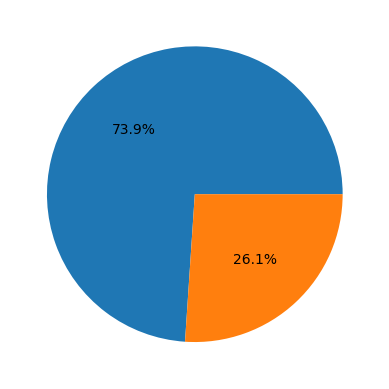

In [39]:
outcome = df['Outcome Type'].value_counts(sort=1)
plt.pie(outcome, autopct='%1.1f%%')

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

### PIPELINE ###
################

# Pipeline with all desired data transformers, along with an estimator
# Later, you can set/reach the parameters by using the names issued - for hyperparameter tuning, for example
pipeline = Pipeline(
    [
        ("data_processing", data_processor),
        (
            "lg",
            LogisticRegression(
                solver="liblinear", penalty="l1", C=0.001, class_weight={0: 1, 1: 20}
            ),
        ),
    ]
)

# Visualize the pipeline
# This will be helpful especially when building more complex pipelines, stringing together multiple preprocessing steps
from sklearn import set_config

set_config(display="diagram")
pipeline

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('numerical_processing',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('num_scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age upon Intake Days',
                                                   'Age upon Outcome Days']),
                                                 ('categorical_processing',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('cat_encoder',
                                                                   OneHot...
                                                                                   max_features=50))]),
                                                  'Name'),
                                                 ('text_processing_1',
                                                  Pipeline(steps=[('text_vectorizer_1',
                                                                   CountVectorizer(binary=True,
                                                                                   max_features=50))]),
                                                  'Address'),
                                                 ('text_processing_2',
                                                  Pipeline(steps=[('text_vectorizer_2',
                                                                   CountVectorizer(binary=True,
                                                                                   max_features=50))]),
                                                  'City')])),
                ('lg',
                 LogisticRegression(C=0.001, class_weight={0: 1, 1: 20},
                                    penalty='l1', solver='liblinear'))])

---
<div class="alert alert-block alert-warning">
<h3><span style="color:blue">Model training</span></h3></div>

Finally, train the classifier with <span style="color:red"><b>.fit()</b></span> on the training dataset. 

In [60]:
# Get training data to train the classifier

X_train = train_data[model_features]
y_train = train_data[model_target]

# Fit the classifier to the training data
# Training data going through the pipeline is imputed (with means from the training data),
#   scaled (with the min/max from the training data),
#   and finally used to fit the model

pipeline.fit(X_train, y_train)
 
print('Training set score: ' + str(pipeline.score(X_train,y_train)))



Training set score: 0.7387860696517413


---
<div class="alert alert-block alert-success">
    <h1><span style="color:blue">Test the classifier</h1></span></div>


<div style="border: 4px solid coral; text-align: center; margin: auto;">
    <h3><i>Try it yourself!</i></h3>
    <br>
    <p style="text-align:center;margin:auto;"><img src="images/challenge.png" alt="Challenge" width="100" /> </p>
    <p style=" text-align: center; margin: auto;">Now that you have a trained classifier, you can evaluate the performance on the test dataset.</p>
    <p style=" text-align: center; margin: auto;">In the following code cell, use <code>.predict()</code> on the <code>pipeline</code> to do this.</p>
    <br>
</div>



In [61]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Get validation data to validate the classifier
X_test = test_data[model_features]
y_test = test_data[model_target]

# Use the fitted model to make predictions on the test dataset
# Testing data going through the pipeline is imputed (with means from the training data),
#   scaled (with the min/max from the training data),
#   and finally used to make predictions

############### CODE HERE ###############

pipeline.fit(X_test, y_test)
test_predictions = pipeline.predict(X_test)


############## END OF CODE ##############

print("Model performance on the test set:\n")
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))
print("Test accuracy:", accuracy_score(y_test, test_predictions))

Model performance on the test set:

[[   0 3041]
 [   0 8783]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      3041
         1.0       0.74      1.00      0.85      8783

    accuracy                           0.74     11824
   macro avg       0.37      0.50      0.43     11824
weighted avg       0.55      0.74      0.63     11824

Test accuracy: 0.7428112313937754


/Users/v.henry/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/v.henry/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/v.henry/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<div style="border: 4px solid coral; text-align: center; margin: auto;">
    <h3><i>It's time to check your knowledge!</i></h3>
    <br>
    <p style=" text-align: center; margin: auto;">To load the question, run the following cell.</p>
    <br>
</div>

In [ ]:
# Run this cell for a knowledge check question
question_2

---
<div class="alert alert-block alert-success">
    <h1><span style="color:blue">Improvement ideas: Probability threshold calibration</h1></span></div>

Other than tuning LogisticRegression hyperparameter values, another path to improve a classifier's performance is to dig deeper into how the classifier actually assigns class membership.

---
<div class="alert alert-block alert-warning">
<h3><span style="color:blue">Comparing binary predictions and probability predictions</span></h3></div>

You can use `classifier.predict()` to examine classifier binary predictions, although the outputs of most classifiers are real-valued, not binary. For most classifiers in sklearn, the `classifier.predict_proba()` method returns class probabilities as a 2D NumPy array of shape (n_samples, n_classes) where the classes are lexicographically ordered.

For this example, you will look at the first five predictions made, in binary format and in real-valued probability format:

In [62]:
pipeline.predict(X_test)[0:5]

array([1., 1., 1., 1., 1.])

In [63]:
pipeline.predict_proba(X_test)[0:5]

array([[0.02154806, 0.97845194],
       [0.02131632, 0.97868368],
       [0.02190317, 0.97809683],
       [0.02214115, 0.97785885],
       [0.02214115, 0.97785885]])

How are the predicted probabilities used to decide class membership? On each row of `predict_proba` output, the probability values sum to 1. The array has two columns, one for each response class: column 0 is the predicted probability that each observation is a member of class 0, and column 1 is the predicted probability that each observation is a member of class 1. From the predicted probabilities, choose the class with the highest probability.

The key here is that a threshold of 0.5 is used by default (for binary problems) to convert predicted probabilities into class predictions: class 0, if predicted probability is less than 0.5, and class 1, if predicted probability is greater than 0.5.

Can you improve classifier performance by changing the classification threshold? Adjust the classification threshold to influence the performance of the classifier.

---
<div class="alert alert-block alert-warning">
<h3><span style="color:blue">Threshold calibration to improve model accuracy</span></h3></div>

Calculate the accuracy by using different values for the classification threshold, and select the threshold that results in the highest accuracy.

Highest accuracy on test: 0.7428112313937754 , Threshold for the highest accuracy: 0.0


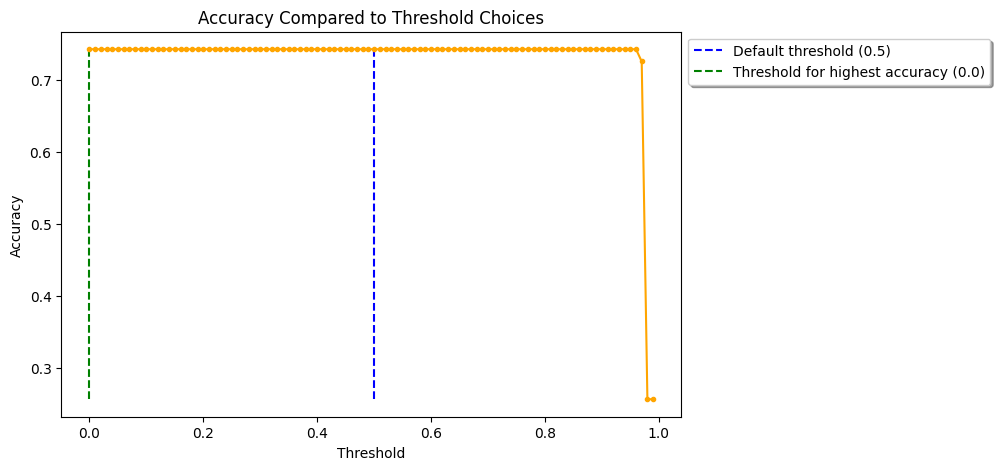

In [64]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Calculate the accuracy by using different values for the classification threshold,
# and select the threshold that results in the highest accuracy.
highest_accuracy = 0
threshold_highest_accuracy = 0

thresholds = np.arange(0, 1, 0.01)
scores = []
for t in thresholds:
    # Set threshold to 't' instead of 0.5
    y_test_other = (pipeline.predict_proba(X_test)[:, 1] >= t).astype(float)
    score = accuracy_score(y_test, y_test_other)
    scores.append(score)
    if score > highest_accuracy:
        highest_accuracy = score
        threshold_highest_accuracy = t
print(
    "Highest accuracy on test:",
    highest_accuracy,
    ", Threshold for the highest accuracy:",
    threshold_highest_accuracy,
)

# Plot the accuracy against the threshold choices
plt.rcParams["figure.figsize"] = (8, 5)
plt.plot(
    [0.5, 0.5],
    [np.min(scores), np.max(scores)],
    linestyle="--",
    color="blue",
    label="Default threshold (0.5)",
)
plt.plot(
    [threshold_highest_accuracy, threshold_highest_accuracy],
    [np.min(scores), np.max(scores)],
    linestyle="--",
    color="green",
    label="Threshold for highest accuracy ({})".format(threshold_highest_accuracy),
)
plt.plot(thresholds, scores, marker=".", color="orange")
plt.title("Accuracy Compared to Threshold Choices")
plt.xlabel("Threshold")
plt.ylabel("Accuracy")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), fancybox=True, shadow=True, ncol=1)
plt.show()

---
<div class="alert alert-block alert-success">
    <h1><span style="color:blue">Conclusion</h1></span></div>

This notebook showed you how to create pipelines to process your data and generate your first logistic regression model.

---
<div class="alert alert-block alert-success">
<h1><span style="color:blue">Action Items</h1></span></div>

In the next lab, you will gain experience with two main types of hyperparameter tuning: 

<span style="color:red"><b>GRID SEARCH AND RANDOMIZED SEARCH</span></b>

